Figuring out how to use tfds by loading in the mnist dataset and creating a convnet for image classification

In [2]:
import keras
import tensorflow as tf
from matplotlib import pyplot
import tensorflow_datasets as tfds
import numpy as np

Using TensorFlow backend.


In [3]:
train_X, train_y = tfds.as_numpy(tfds.load('mnist', split='train', shuffle_files=True, batch_size=-1, as_supervised = True))
test_X, test_y = tfds.as_numpy(tfds.load('mnist', split='test', shuffle_files=True, batch_size=-1, as_supervised = True))

In [4]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [5]:
train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.0
test_X = test_X/255.0

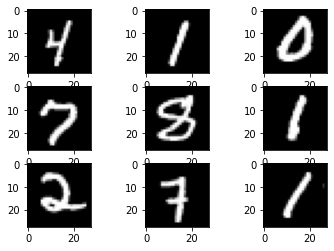

In [7]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [8]:
for i in range(9):
    print(np.argmax(train_y[i]))

4
1
0
7
8
1
2
7
1


In [9]:
def model(input_shape):
    X_input = keras.layers.Input(input_shape)
    X = keras.layers.Conv2D(32, (3,3), activation='relu')(X_input)
    X = keras.layers.MaxPooling2D((2,2))(X)
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(128, activation='relu')(X)
    X = keras.layers.Dense(64, activation='relu')(X)
    X = keras.layers.Dense(10, activation='softmax')(X)
    model = keras.models.Model(inputs = X_input, outputs = X)
    return model

In [10]:
testmodel = model(train_X.shape[1:])

In [11]:
testmodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650 

In [12]:
testmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
testmodel.fit(train_X, train_y, epochs=2)

Epoch 1/2
12512/60000 [=====>........................] - ETA: 49s - loss: 0.3570 - accuracy: 0.8914

KeyboardInterrupt: 

In [33]:
testmodel.evaluate(test_X, test_y)

10000/10000 [==============================] - 2s 165us/step


[0.04859514253437519, 0.984000027179718]

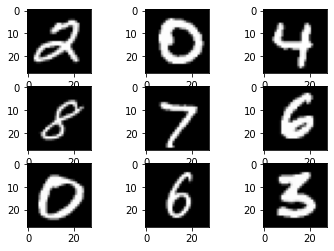

In [56]:
samples = []
for sample in range(9):
    pyplot.subplot(330 + 1 + sample)
    pyplot.imshow(test_X[sample], cmap=pyplot.get_cmap('gray'))
    samples.append(test_X[sample])
pyplot.show()

In [57]:
samples = np.array(samples)
prediction = np.argmax(testmodel.predict(samples), axis=1)
print(prediction)

[2 0 4 8 7 6 0 6 3]


In [15]:
#keras.backend.clear_session()